### ImagesClassificationWithSIFT with zca_whitening_parameter to False and featurewise_std_normalization_parameter to True

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
# To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)


# import scipy as sio
# print("Scipy Version :"+sio.__version__)
import scipy.io as sio
import os
import shutil
import random
import cv2 as cv
print("OpenCV Version : "+cv.__version__)
from PIL import Image

# To be able to use Warning
import warnings
import sklearn
print("Sklearn Version : "+sklearn.__version__)
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from catboost import CatBoostClassifier
import catboost
print("Catboost Version : "+catboost.__version__)
from catboost import CatBoostClassifier
# from utils import plot_confusion_matrix

from keras.preprocessing.image import load_img, img_to_array
from keras.applications.xception import preprocess_input
from keras.applications import *
from keras.applications.xception import decode_predictions
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import *
import tensorflow as tf
print("Keras Version : "+tf.keras.__version__)
print("Tensorflow Version : "+tf.__version__)

Python Version :sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.5
Pandas Version :1.0.5
Seaborn Version :0.10.1
OpenCV Version : 3.4.2
Sklearn Version : 0.23.1
Catboost Version : 0.24


Using TensorFlow backend.


Keras Version : 2.2.4-tf
Tensorflow Version : 2.1.0


In [2]:
images_directory = './images/Images/'
# train_contents = sio.loadmat('./lists/train_list.mat')
# test_contents = sio.loadmat('./lists/test_list.mat')
# file_list = sio.loadmat('./lists/file_list.mat')
train_directory = './images/train/'
test_directory = './images/test/'

### Rename the folder names

In [ ]:
def convert(word):
    return ''.join(x.capitalize() or '_' for x in word.split('_'))

In [ ]:
for root, dirs, files in os.walk(images_directory):
    for count in dirs:
        print(convert(count.split('-')[1].capitalize()))
        os.rename(os.path.join(images_directory, count), os.path.join(images_directory, convert(count.split('-')[1].capitalize())))


### Creation of the  train test directory

In [ ]:
train_dir = './images/train/'
test_dir = './images/test/'


In [ ]:
files = [file for file in os.listdir(images_directory) if os.path.isfile(os.path.join(images_directory, file))]

In [ ]:
directories = [directory for directory in os.listdir(images_directory)]

In [ ]:
directories

In [ ]:
for directory in directories:
    os.mkdir(train_dir+directory)
    os.mkdir(test_dir+directory)

### Split train test

In [ ]:
directories

In [ ]:
for directory in directories:
    files = [file for file in os.listdir(images_directory+directory) if os.path.isfile(os.path.join(images_directory+directory, file))]
    train_count  = np.round(70/100*len(files))
    test_count = np.round(30/100*len(files))
    rndnums = list(random.sample(range(0, len(files)), len(files)))
    print("len(files)",len(files))
    train_file_index = rndnums[0:int(train_count)+1]
    train_file_name = [files[i] for i in train_file_index]
    test_file_index = rndnums[int(train_count)+1:int(train_count + test_count)+1]
    test_file_name = [files[i] for i in test_file_index]
    for x in train_file_name:
        file = x
        shutil.copyfile(os.path.join(images_directory+directory, file), os.path.join(train_directory+directory, file))
    ##test_files
    for y in test_file_name:
        file = y
        shutil.copyfile(os.path.join(images_directory+directory, file), os.path.join(test_directory+directory, file))

    

In [3]:
input_directory='./images/'
output_directory='./new_images/'
small_directory_names = [directory for directory in os.listdir(input_directory+'train-small2')]
small_directory_names.sort()
zca_whitening_parameter=False
featurewise_std_normalization_parameter=True
color_mode_parameter='grayscale'
save_prefix_parameter='set1_'
batch_size=2
follow_links=True
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zca_whitening=zca_whitening_parameter,
        featurewise_std_normalization=featurewise_std_normalization_parameter
        )

/home/david/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [4]:
small_directory_names

['Basset',
 'BouvierDesFlandres',
 'Cardigan',
 'Dingo',
 'FrenchBulldog',
 'OldEnglishSheepdog']

In [5]:
myCategories = dict(enumerate(small_directory_names))

In [6]:
myCategories

{0: 'Basset',
 1: 'BouvierDesFlandres',
 2: 'Cardigan',
 3: 'Dingo',
 4: 'FrenchBulldog',
 5: 'OldEnglishSheepdog'}

In [7]:
train_generator = train_datagen.flow_from_directory(input_directory+'train-small2', target_size=(224, 224), follow_links=True, batch_size=batch_size, class_mode='categorical', save_format='jpeg', classes=small_directory_names, subset='training', shuffle=False, color_mode=color_mode_parameter)

Found 678 images belonging to 6 classes.


In [8]:
test_generator = train_datagen.flow_from_directory(input_directory+'test-small2', target_size=(224, 224), follow_links=True, batch_size=batch_size, class_mode='categorical', save_format='jpeg', classes=small_directory_names, shuffle=False, color_mode=color_mode_parameter)

Found 284 images belonging to 6 classes.


In [9]:
train_df = pd.DataFrame(columns=["Category", "Picture","Descriptors", "NumberOfDescriptors"])

In [10]:
test_df = pd.DataFrame(columns=["Category", "Picture","Descriptors", "NumberOfDescriptors"])

### Compute the descriptors  and add them with the category into a dataframe

In [11]:
algo_constructor = cv.xfeatures2d.SIFT_create()
def computeDescriptors(mygenerator, mydf, mydescriptors):
    count = 0
    for i in range(len(mygenerator)):
    #next(train_generator)
        for j in range(batch_size):
            img = mygenerator[i][0][j].squeeze()
            imgwithrgb = cv.merge([img, img, img])
            image8bit = cv.normalize(imgwithrgb, None, 0, 255, cv.NORM_MINMAX).astype('uint8')
            keypoints, descriptors = algo_constructor.detectAndCompute(image8bit, None)
            mydf = mydf.append({'Category': mygenerator[i][1][j].tolist().index(1), 'Picture':image8bit, 'Descriptors':descriptors, 'NumberOfDescriptors':descriptors.shape[0]}, ignore_index='True')
            mydescriptors.extend(descriptors)
            count = count + 1
            j = j+1
    i = i+1
    mydf['Category'] = mydf['Category'].map(myCategories) 
    return mydf, mydescriptors

### Train 

In [12]:
train_descriptors_array=[]
train_df, train_descriptors_array=computeDescriptors(train_generator, train_df, train_descriptors_array)

/home/david/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/david/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
plt.imshow(train_df['Picture'][0])
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(60, 12))
axs[0].set_title('An Original Picture in grayscale  ', fontsize=20)
axs[0].imshow(train_df['Picture'][0], cmap='Greys_r')
axs[1].set_title('Histogram of an original Picture in grayscale ', fontsize=20)
axs[1].set_xlabel('Level of gray', fontsize=20)
axs[1].set_ylabel('Number of pixels', fontsize=20)
axs[1].hist(train_df['Picture'][0].ravel(), 256, [0, 256])


### Test

In [13]:
test_descriptors_array=[]
test_df, test_descriptors_array=computeDescriptors(test_generator, test_df, test_descriptors_array)

In [ ]:
print(train_df['NumberOfDescriptors'].sum())

In [ ]:
print(test_df['NumberOfDescriptors'].sum())

### Apply a Kmeans to get clusters

In [14]:
# A k-means clustering algorithm who takes 2 parameter which is number
# of cluster(k) and the other is descriptors list(unordered 1d array)
# Returns an array that holds central points.
def kmeans(k, descriptor_list):
    # kmeans = KMeans(n_clusters=k, n_init=10)
    mymodel = MiniBatchKMeans(n_clusters=k, n_init=10)
    mymodel.fit(descriptor_list)
    visual_words = mymodel.cluster_centers_
    labels = mymodel.labels_
    silhouette_score = metrics.silhouette_score(descriptor_list, labels)
    calinski_harabasz_score = metrics.calinski_harabasz_score(descriptor_list, labels)
    print('silhouette_score '+str(silhouette_score))
    print('calinski_harabasz_score '+str(calinski_harabasz_score))
    return mymodel, visual_words, labels
# Takes the central points which is visual words
model, visual_words, labels = kmeans(150, train_descriptors_array)

silhouette_score 0.025227832
calinski_harabasz_score 1198.7159198620602


In [15]:
X_train = pd.DataFrame(columns=range(len(visual_words)))
X_test = pd.DataFrame(columns=range(len(visual_words)))

In [16]:
for index, row in train_df.iterrows():
    labels = model.predict(pd.DataFrame(row["Descriptors"]).astype(float))
    unique, counts = np.unique(labels, return_counts=True)
    X_train = X_train.append(dict(zip(unique, counts)), ignore_index=True)

In [17]:
X_train.fillna(0, inplace=True)

In [ ]:
X_train

In [ ]:
train_df

### TSNE

In [18]:
X_train_embedded = TSNE(n_components=2).fit_transform(X_train)
X_train_embedded_df = pd.DataFrame(X_train_embedded, columns=['SIFT1', 'SIFT2'])

In [19]:
X_train_embedded_df['Category'] = train_df['Category']

silhouette_score -0.1033753
calinski_harabasz_score 13.308953844109888


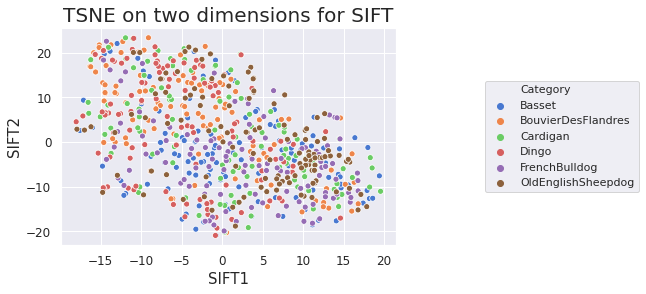

In [20]:
sns.set(palette='muted', color_codes=True, style='darkgrid')
ax = sns.scatterplot(x='SIFT1', y='SIFT2', hue="Category", data=X_train_embedded_df)
ax.set_title('TSNE on two dimensions for SIFT', fontsize=20)
ax.set_xlabel('SIFT1', fontsize=15)
ax.set_ylabel('SIFT2', fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.tick_params(labelsize=12)
silhouette_score = metrics.silhouette_score(X_train_embedded, train_df['Category'])
calinski_harabasz_score = metrics.calinski_harabasz_score(X_train_embedded, train_df['Category'])
print('silhouette_score '+str(silhouette_score))
print('calinski_harabasz_score '+str(calinski_harabasz_score))

In [21]:
for index, row in test_df.iterrows():
    labels = model.predict(pd.DataFrame(row["Descriptors"]).astype(float))
    unique, counts = np.unique(labels, return_counts=True)
    X_test = X_test.append(dict(zip(unique, counts)), ignore_index=True)

In [22]:
X_test.fillna(0, inplace=True)

In [23]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,7.0,0.0,5.0,0.0,1.0,3.0,2.0,1.0,4.0,3.0,...,4.0,1.0,2.0,0.0,3.0,3.0,0.0,4.0,1.0,1.0
1,7.0,0.0,1.0,4.0,1.0,4.0,8.0,2.0,2.0,2.0,...,1.0,3.0,2.0,1.0,9.0,2.0,0.0,3.0,6.0,3.0
2,3.0,0.0,6.0,2.0,3.0,3.0,1.0,2.0,1.0,0.0,...,3.0,1.0,3.0,0.0,2.0,2.0,6.0,1.0,0.0,0.0
3,1.0,2.0,2.0,2.0,0.0,1.0,4.0,0.0,5.0,2.0,...,6.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,4.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,...,0.0,1.0,2.0,1.0,0.0,2.0,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,4.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,2.0,...,0.0,1.0,1.0,2.0,2.0,6.0,3.0,0.0,0.0,2.0
280,5.0,5.0,3.0,2.0,3.0,0.0,0.0,2.0,2.0,1.0,...,0.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0
281,1.0,0.0,6.0,0.0,3.0,0.0,3.0,2.0,1.0,5.0,...,0.0,0.0,0.0,1.0,0.0,4.0,3.0,1.0,1.0,3.0
282,1.0,8.0,5.0,4.0,1.0,0.0,2.0,5.0,0.0,3.0,...,1.0,1.0,4.0,4.0,4.0,1.0,5.0,2.0,4.0,0.0


In [24]:
le = LabelEncoder().fit(train_df['Category'])

In [25]:
y_train = le.transform(train_df['Category'])
y_test = le.transform(test_df['Category'])

In [ ]:
y_test

### CatBoostClassifier 

In [26]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

In [27]:
clf.fit(
    X_train, y_train
    # cat_features=[0, 1, 2]
)

0:	learn: 1.7697446	total: 70.5ms	remaining: 1m 10s
1:	learn: 1.7478460	total: 79ms	remaining: 39.4s
2:	learn: 1.7243374	total: 87.4ms	remaining: 29s
3:	learn: 1.7096928	total: 95.2ms	remaining: 23.7s
4:	learn: 1.6881491	total: 106ms	remaining: 21.1s
5:	learn: 1.6665089	total: 112ms	remaining: 18.6s
6:	learn: 1.6445711	total: 118ms	remaining: 16.8s
7:	learn: 1.6254878	total: 125ms	remaining: 15.5s
8:	learn: 1.6098599	total: 131ms	remaining: 14.4s
9:	learn: 1.5949007	total: 138ms	remaining: 13.7s
10:	learn: 1.5782745	total: 144ms	remaining: 13s
11:	learn: 1.5640403	total: 153ms	remaining: 12.6s
12:	learn: 1.5495388	total: 159ms	remaining: 12.1s
13:	learn: 1.5330851	total: 166ms	remaining: 11.7s
14:	learn: 1.5225376	total: 171ms	remaining: 11.2s
15:	learn: 1.5096852	total: 176ms	remaining: 10.8s
16:	learn: 1.4940358	total: 181ms	remaining: 10.5s
17:	learn: 1.4813685	total: 186ms	remaining: 10.2s
18:	learn: 1.4728634	total: 191ms	remaining: 9.86s
19:	learn: 1.4609724	total: 196ms	remainin

169:	learn: 0.4628987	total: 3s	remaining: 14.6s
170:	learn: 0.4588396	total: 3.02s	remaining: 14.7s
171:	learn: 0.4554683	total: 3.07s	remaining: 14.8s
172:	learn: 0.4527851	total: 3.09s	remaining: 14.8s
173:	learn: 0.4497824	total: 3.11s	remaining: 14.8s
174:	learn: 0.4461336	total: 3.13s	remaining: 14.8s
175:	learn: 0.4447667	total: 3.16s	remaining: 14.8s
176:	learn: 0.4422082	total: 3.17s	remaining: 14.7s
177:	learn: 0.4381422	total: 3.18s	remaining: 14.7s
178:	learn: 0.4350113	total: 3.19s	remaining: 14.6s
179:	learn: 0.4323318	total: 3.21s	remaining: 14.6s
180:	learn: 0.4290276	total: 3.22s	remaining: 14.6s
181:	learn: 0.4266530	total: 3.25s	remaining: 14.6s
182:	learn: 0.4242283	total: 3.28s	remaining: 14.6s
183:	learn: 0.4209444	total: 3.3s	remaining: 14.7s
184:	learn: 0.4178139	total: 3.31s	remaining: 14.6s
185:	learn: 0.4149211	total: 3.33s	remaining: 14.6s
186:	learn: 0.4127149	total: 3.33s	remaining: 14.5s
187:	learn: 0.4099644	total: 3.35s	remaining: 14.5s
188:	learn: 0.40

342:	learn: 0.1878172	total: 6.66s	remaining: 12.8s
343:	learn: 0.1868468	total: 6.67s	remaining: 12.7s
344:	learn: 0.1861234	total: 6.69s	remaining: 12.7s
345:	learn: 0.1851467	total: 6.7s	remaining: 12.7s
346:	learn: 0.1844516	total: 6.74s	remaining: 12.7s
347:	learn: 0.1834493	total: 6.76s	remaining: 12.7s
348:	learn: 0.1827477	total: 6.78s	remaining: 12.7s
349:	learn: 0.1821360	total: 6.8s	remaining: 12.6s
350:	learn: 0.1813125	total: 6.81s	remaining: 12.6s
351:	learn: 0.1808205	total: 6.82s	remaining: 12.6s
352:	learn: 0.1801226	total: 6.84s	remaining: 12.5s
353:	learn: 0.1795392	total: 6.85s	remaining: 12.5s
354:	learn: 0.1786382	total: 6.87s	remaining: 12.5s
355:	learn: 0.1777357	total: 6.9s	remaining: 12.5s
356:	learn: 0.1770496	total: 6.93s	remaining: 12.5s
357:	learn: 0.1762204	total: 6.94s	remaining: 12.4s
358:	learn: 0.1750541	total: 6.95s	remaining: 12.4s
359:	learn: 0.1744766	total: 6.96s	remaining: 12.4s
360:	learn: 0.1737101	total: 6.97s	remaining: 12.3s
361:	learn: 0.1

511:	learn: 0.1039654	total: 9.39s	remaining: 8.95s
512:	learn: 0.1036468	total: 9.4s	remaining: 8.92s
513:	learn: 0.1033918	total: 9.43s	remaining: 8.91s
514:	learn: 0.1030527	total: 9.45s	remaining: 8.9s
515:	learn: 0.1027467	total: 9.47s	remaining: 8.88s
516:	learn: 0.1025995	total: 9.48s	remaining: 8.86s
517:	learn: 0.1023358	total: 9.49s	remaining: 8.83s
518:	learn: 0.1020375	total: 9.5s	remaining: 8.8s
519:	learn: 0.1018064	total: 9.51s	remaining: 8.78s
520:	learn: 0.1015128	total: 9.52s	remaining: 8.75s
521:	learn: 0.1011872	total: 9.54s	remaining: 8.74s
522:	learn: 0.1010231	total: 9.57s	remaining: 8.73s
523:	learn: 0.1007804	total: 9.58s	remaining: 8.7s
524:	learn: 0.1005000	total: 9.59s	remaining: 8.68s
525:	learn: 0.1001711	total: 9.6s	remaining: 8.65s
526:	learn: 0.0999349	total: 9.62s	remaining: 8.63s
527:	learn: 0.0995810	total: 9.63s	remaining: 8.61s
528:	learn: 0.0992399	total: 9.65s	remaining: 8.59s
529:	learn: 0.0989217	total: 9.66s	remaining: 8.57s
530:	learn: 0.0987

670:	learn: 0.0693004	total: 12.1s	remaining: 5.93s
671:	learn: 0.0690830	total: 12.1s	remaining: 5.91s
672:	learn: 0.0688939	total: 12.1s	remaining: 5.9s
673:	learn: 0.0687148	total: 12.2s	remaining: 5.9s
674:	learn: 0.0685156	total: 12.2s	remaining: 5.88s
675:	learn: 0.0683571	total: 12.2s	remaining: 5.86s
676:	learn: 0.0682360	total: 12.2s	remaining: 5.84s
677:	learn: 0.0681109	total: 12.3s	remaining: 5.82s
678:	learn: 0.0679080	total: 12.3s	remaining: 5.8s
679:	learn: 0.0677511	total: 12.3s	remaining: 5.78s
680:	learn: 0.0677188	total: 12.3s	remaining: 5.76s
681:	learn: 0.0675460	total: 12.3s	remaining: 5.75s
682:	learn: 0.0673328	total: 12.4s	remaining: 5.74s
683:	learn: 0.0671272	total: 12.4s	remaining: 5.72s
684:	learn: 0.0669298	total: 12.4s	remaining: 5.7s
685:	learn: 0.0669093	total: 12.4s	remaining: 5.68s
686:	learn: 0.0668361	total: 12.4s	remaining: 5.66s
687:	learn: 0.0666216	total: 12.4s	remaining: 5.64s
688:	learn: 0.0664176	total: 12.4s	remaining: 5.62s
689:	learn: 0.06

832:	learn: 0.0501047	total: 15.3s	remaining: 3.07s
833:	learn: 0.0500617	total: 15.3s	remaining: 3.05s
834:	learn: 0.0499702	total: 15.4s	remaining: 3.04s
835:	learn: 0.0498539	total: 15.4s	remaining: 3.02s
836:	learn: 0.0497950	total: 15.4s	remaining: 3s
837:	learn: 0.0496985	total: 15.5s	remaining: 2.99s
838:	learn: 0.0496184	total: 15.5s	remaining: 2.97s
839:	learn: 0.0495332	total: 15.5s	remaining: 2.96s
840:	learn: 0.0494710	total: 15.6s	remaining: 2.94s
841:	learn: 0.0494131	total: 15.6s	remaining: 2.93s
842:	learn: 0.0493283	total: 15.6s	remaining: 2.91s
843:	learn: 0.0492594	total: 15.6s	remaining: 2.89s
844:	learn: 0.0491639	total: 15.7s	remaining: 2.88s
845:	learn: 0.0490682	total: 15.7s	remaining: 2.86s
846:	learn: 0.0489847	total: 15.7s	remaining: 2.84s
847:	learn: 0.0489017	total: 15.7s	remaining: 2.82s
848:	learn: 0.0488030	total: 15.7s	remaining: 2.8s
849:	learn: 0.0487273	total: 15.8s	remaining: 2.79s
850:	learn: 0.0486096	total: 15.8s	remaining: 2.77s
851:	learn: 0.04

In [28]:
y_pred = clf.predict(data=X_test)

In [ ]:
X_test

### Results

----- Accuracy: 43.31 % -----


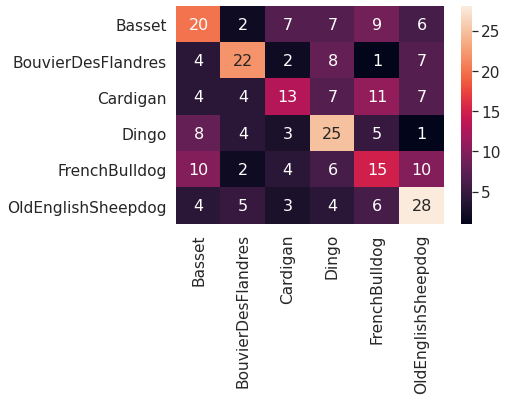

In [29]:
print(f'----- Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f} % -----')

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), small_directory_names, small_directory_names)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()